## 라이브러리 설치 및 구글 드라이브 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 나눔폰트 설치 및 확인

In [2]:
# 한국어 출력을 위한 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

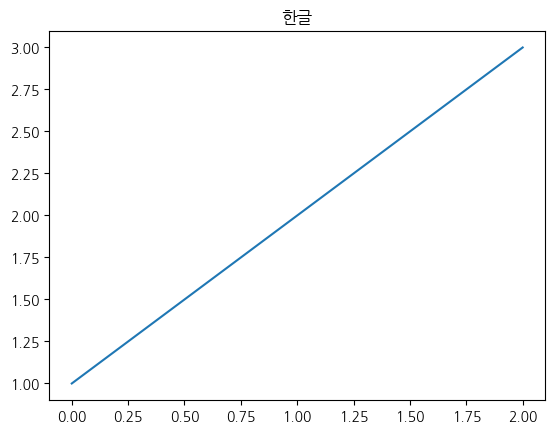

In [3]:
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 데이터 불러오기

In [4]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/jeju/'
bf_result = pd.read_csv(DATA_PATH + '2022_bf_result.csv')
bf_result

,분류,세부분류,사례수,7월선택률(%),8월선택률(%),처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토,제주도 우선,해외여행 우선,...,모름,별로 비싸지 않다,비슷하다,조금 비싸다,매우 비싸다,비싸지 않다,비슷하다.1,비싸다,척도평균,100점평균
0,전체,NaN,1000,30.3,69.7,67.5,16.5,16.0,42.2,20.1,...,8.3,0.6,16.9,58.5,24.0,0.6,16.9,82.5,4.06,76.47
1,성별,남자,580,29.0,71.0,63.6,20.7,15.7,39.5,22.8,...,7.1,0.5,16.2,57.8,25.5,0.5,16.2,83.3,4.08,77.07
2,성별,여자,420,32.1,67.9,72.9,10.7,16.4,46.0,16.4,...,10.0,0.7,17.9,59.5,21.9,0.7,17.9,81.4,4.03,75.65
3,연령,15~20세,33,30.3,69.7,57.6,24.2,18.2,60.6,12.1,...,9.1,0.0,30.3,51.5,18.2,0.0,30.3,69.7,3.88,71.97
4,연령,21~30세,153,37.3,62.7,72.5,13.1,14.4,39.2,12.4,...,9.2,0.0,20.3,64.1,15.7,0.0,20.3,79.7,3.95,73.86
5,연령,31~40세,278,36.3,63.7,72.3,16.2,11.5,44.6,17.3,...,7.6,0.7,17.3,56.5,25.5,0.7,17.3,82.0,4.07,76.71
6,연령,41~50세,315,26.0,74.0,66.0,16.2,17.8,41.0,23.5,...,9.2,1.0,12.1,57.1,29.8,1.0,12.1,87.0,4.16,78.97
7,연령,51~60세,155,23.9,76.1,61.3,16.1,22.6,38.1,25.2,...,7.7,0.0,18.7,57.4,23.9,0.0,18.7,81.3,4.05,76.29
8,연령,61세 이상,66,24.2,75.8,62.1,24.2,13.6,45.5,25.8,...,6.1,1.5,19.7,66.7,12.1,1.5,19.7,78.8,3.89,72.35
9,월 평균 가구소득,400만원 미만,205,33.2,66.8,72.7,13.7,13.7,49.3,12.7,...,13.7,1.0,22.0,56.6,20.5,1.0,22.0,77.1,3.97,74.15


## 전체 응답자 시각화

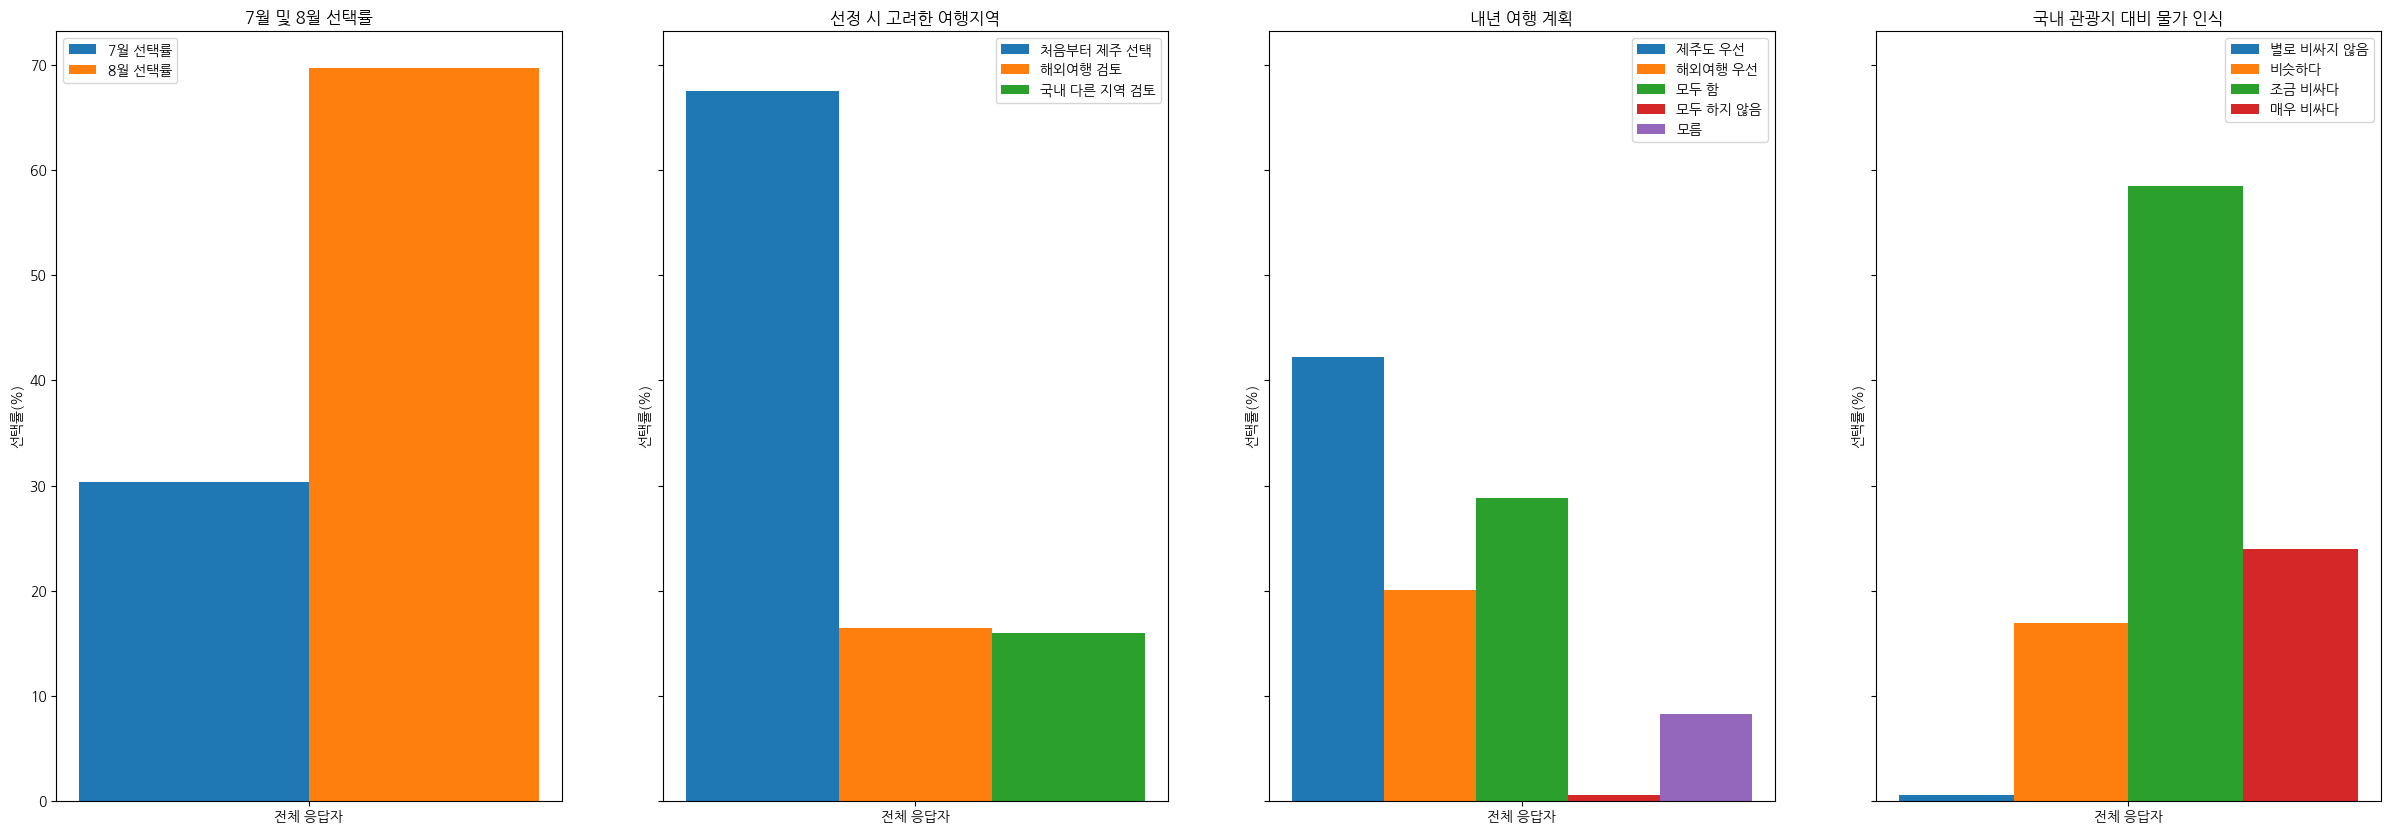

In [11]:
# 전체 응답자 시각화
all_plan = bf_result.loc[0, ['7월선택률(%)', '8월선택률(%)']]
all_trip = bf_result.loc[0, ['처음부터 제주 선택',	'해외여행 검토',	'국내 다른 지역 검토']]
all_future = bf_result.loc[0, ['제주도 우선',	'해외여행 우선',	'모두 함',	'모두 하지 않음',	'모름']]
all_price = bf_result.loc[0, ['별로 비싸지 않다',	'비슷하다',	'조금 비싸다',	'매우 비싸다']]

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(30, 10))
x_labels = ['전체 응답자']

# 막대 그래프 너비 설정
bar_width = 0.10
index = np.arange(len(x_labels))

# 서브플롯1
ax[0].bar(index - bar_width/2, all_plan['7월선택률(%)'], bar_width, label='7월 선택률')
ax[0].bar(index + bar_width/2, all_plan['8월선택률(%)'], bar_width, label='8월 선택률')
ax[0].set_title('7월 및 8월 선택률')
ax[0].set_ylabel('선택률(%)')
ax[0].set_xticks(index)
ax[0].set_xticklabels(x_labels)
ax[0].legend()

# 서브플롯2
ax[1].bar(index - bar_width, all_trip['처음부터 제주 선택'], bar_width, label='처음부터 제주 선택')
ax[1].bar(index, all_trip['해외여행 검토'], bar_width, label='해외여행 검토')
ax[1].bar(index + bar_width, all_trip['국내 다른 지역 검토'], bar_width, label='국내 다른 지역 검토')
ax[1].set_title('선정 시 고려한 여행지역')
ax[1].set_ylabel('선택률(%)')
ax[1].set_xticks(index)
ax[1].set_xticklabels(x_labels)
ax[1].legend()

# 서브플롯3
ax[2].bar(index - 2 * bar_width, all_future['제주도 우선'], bar_width, label='제주도 우선')
ax[2].bar(index - bar_width, all_future['해외여행 우선'], bar_width, label='해외여행 우선')
ax[2].bar(index, all_future['모두 함'], bar_width, label='모두 함')
ax[2].bar(index + bar_width, all_future['모두 하지 않음'], bar_width, label='모두 하지 않음')
ax[2].bar(index + 2 * bar_width, all_future['모름'], bar_width, label='모름')
ax[2].set_title('내년 여행 계획')
ax[2].set_ylabel('선택률(%)')
ax[2].set_xticks(index)
ax[2].set_xticklabels(x_labels)
ax[2].legend()

# 서브플롯4
ax[3].bar(index - 1.5 * bar_width, all_price['별로 비싸지 않다'], bar_width, label='별로 비싸지 않음')
ax[3].bar(index - 0.5 * bar_width, all_price['비슷하다'], bar_width, label='비슷하다')
ax[3].bar(index + 0.5 * bar_width, all_price['조금 비싸다'], bar_width, label='조금 비싸다')
ax[3].bar(index + 1.5 * bar_width, all_price['매우 비싸다'], bar_width, label='매우 비싸다')
ax[3].set_title('국내 관광지 대비 물가 인식')
ax[3].set_ylabel('선택률(%)')
ax[3].set_xticks(index)
ax[3].set_xticklabels(x_labels)
ax[3].legend()

## 성별 시각화

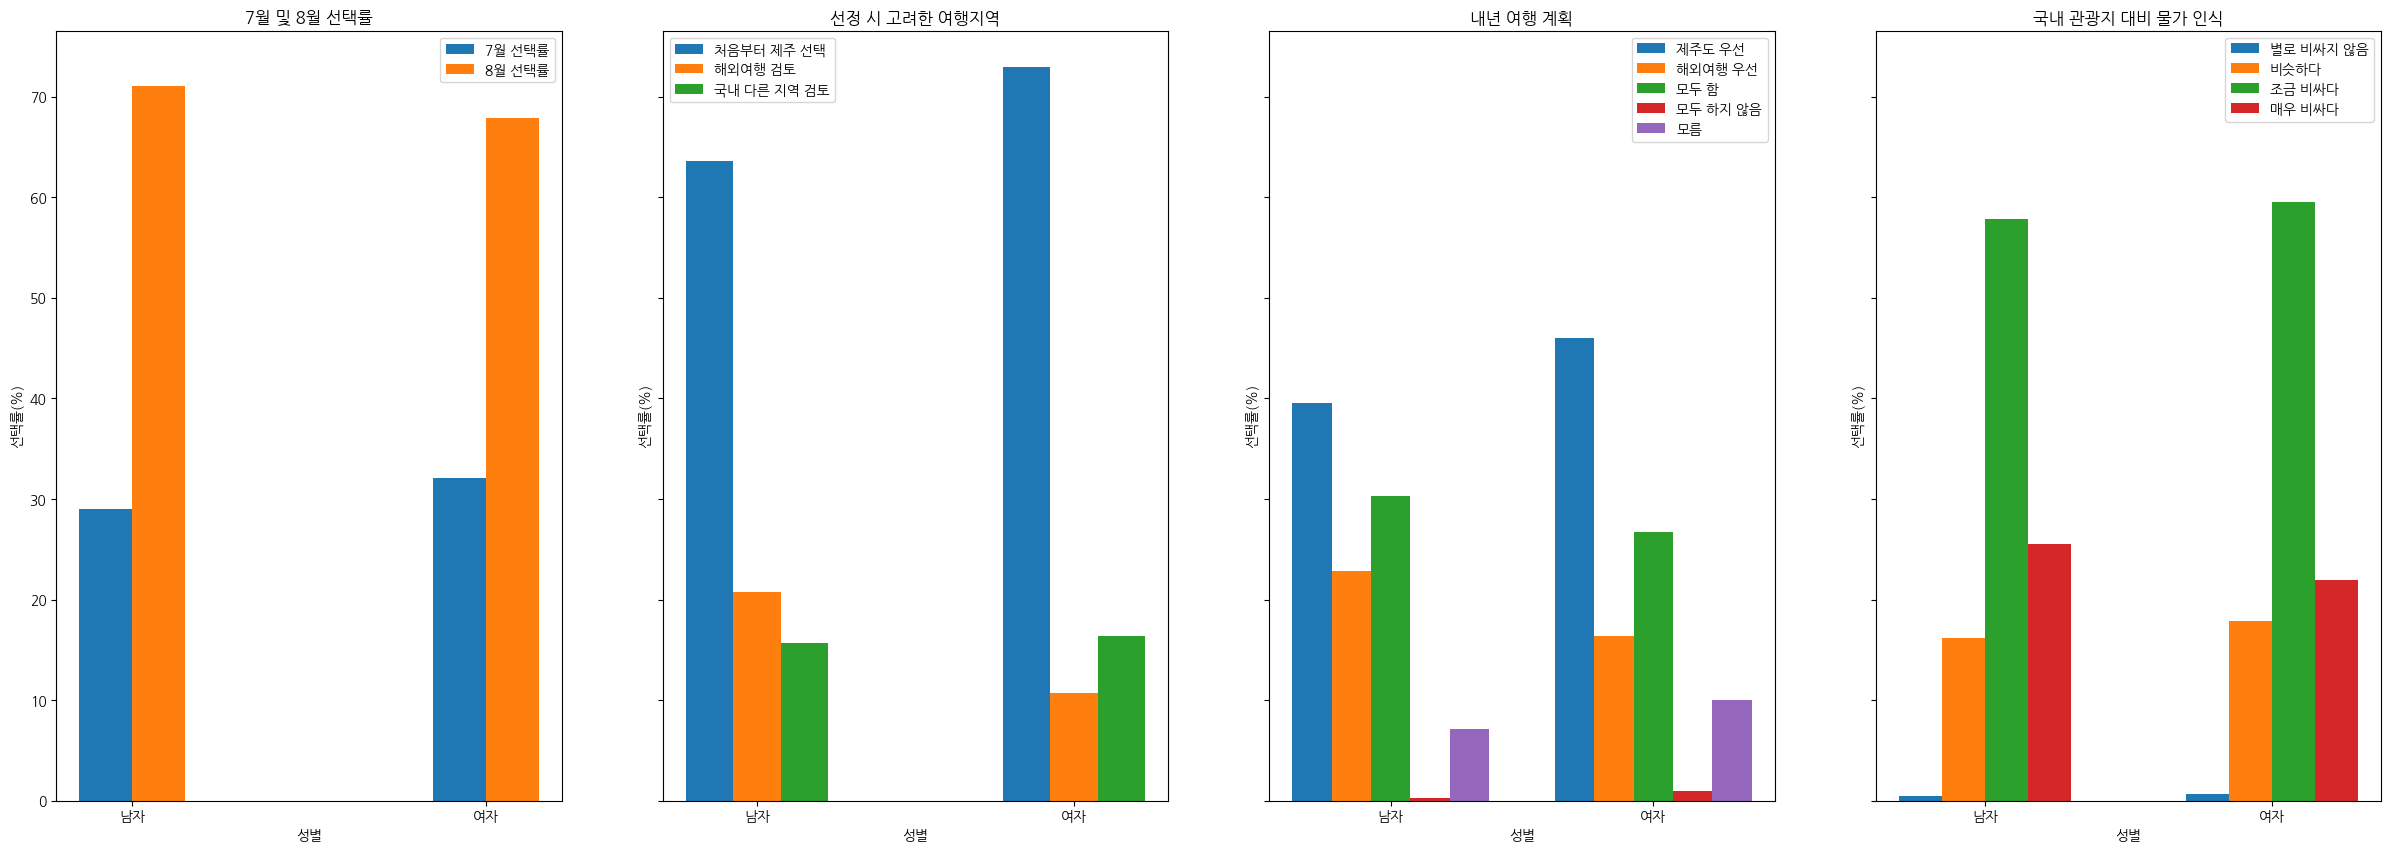

In [5]:
# 성별 시각화
gender_plan = bf_result.loc[1:2, ['7월선택률(%)', '8월선택률(%)']]
gender_trip = bf_result.loc[1:2, ['처음부터 제주 선택',	'해외여행 검토',	'국내 다른 지역 검토']]
gender_future = bf_result.loc[1:2, ['제주도 우선',	'해외여행 우선',	'모두 함',	'모두 하지 않음',	'모름']]
gender_price = bf_result.loc[1:2, ['별로 비싸지 않다',	'비슷하다',	'조금 비싸다',	'매우 비싸다']]

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(30, 10))
x_labels = ['남자', '여자']

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 서브플롯1
ax[0].bar(index - bar_width/2, gender_plan['7월선택률(%)'], bar_width, label='7월 선택률')
ax[0].bar(index + bar_width/2, gender_plan['8월선택률(%)'], bar_width, label='8월 선택률')
ax[0].set_title('7월 및 8월 선택률')
ax[0].set_xlabel('성별')
ax[0].set_ylabel('선택률(%)')
ax[0].set_xticks(index)
ax[0].set_xticklabels(x_labels)
ax[0].legend()

# 서브플롯2
ax[1].bar(index - bar_width, gender_trip['처음부터 제주 선택'], bar_width, label='처음부터 제주 선택')
ax[1].bar(index, gender_trip['해외여행 검토'], bar_width, label='해외여행 검토')
ax[1].bar(index + bar_width, gender_trip['국내 다른 지역 검토'], bar_width, label='국내 다른 지역 검토')
ax[1].set_title('선정 시 고려한 여행지역')
ax[1].set_xlabel('성별')
ax[1].set_ylabel('선택률(%)')
ax[1].set_xticks(index)
ax[1].set_xticklabels(x_labels)
ax[1].legend()

# 서브플롯3
ax[2].bar(index - 2 * bar_width, gender_future['제주도 우선'], bar_width, label='제주도 우선')
ax[2].bar(index - bar_width, gender_future['해외여행 우선'], bar_width, label='해외여행 우선')
ax[2].bar(index, gender_future['모두 함'], bar_width, label='모두 함')
ax[2].bar(index + bar_width, gender_future['모두 하지 않음'], bar_width, label='모두 하지 않음')
ax[2].bar(index + 2 * bar_width, gender_future['모름'], bar_width, label='모름')
ax[2].set_title('내년 여행 계획')
ax[2].set_xlabel('성별')
ax[2].set_ylabel('선택률(%)')
ax[2].set_xticks(index)
ax[2].set_xticklabels(x_labels)
ax[2].legend()

# 서브플롯4
ax[3].bar(index - 1.5 * bar_width, gender_price['별로 비싸지 않다'], bar_width, label='별로 비싸지 않음')
ax[3].bar(index - 0.5 * bar_width, gender_price['비슷하다'], bar_width, label='비슷하다')
ax[3].bar(index + 0.5 * bar_width, gender_price['조금 비싸다'], bar_width, label='조금 비싸다')
ax[3].bar(index + 1.5 * bar_width, gender_price['매우 비싸다'], bar_width, label='매우 비싸다')
ax[3].set_title('국내 관광지 대비 물가 인식')
ax[3].set_xlabel('성별')
ax[3].set_ylabel('선택률(%)')
ax[3].set_xticks(index)
ax[3].set_xticklabels(x_labels)
ax[3].legend()

## 연령 시각화
- 생각해볼 점 : 15-20세와 61세 이상의 수가 적어서 일단 15-20세와 20-30세를 합쳐서 청년층으로 묶을 수도 있지 않나 생각도 들지만, 이 프로젝트가 여행과 관련되었으며 제주도 특성상 숙박여행이기 때문에 단독이나 또래끼리의 숙박여행이 불가하여 단체여행이나 가족여행이 주를 이루는 청소년층과 20대를 묶기엔 애매하지 않나 하는 의문점이 있음...

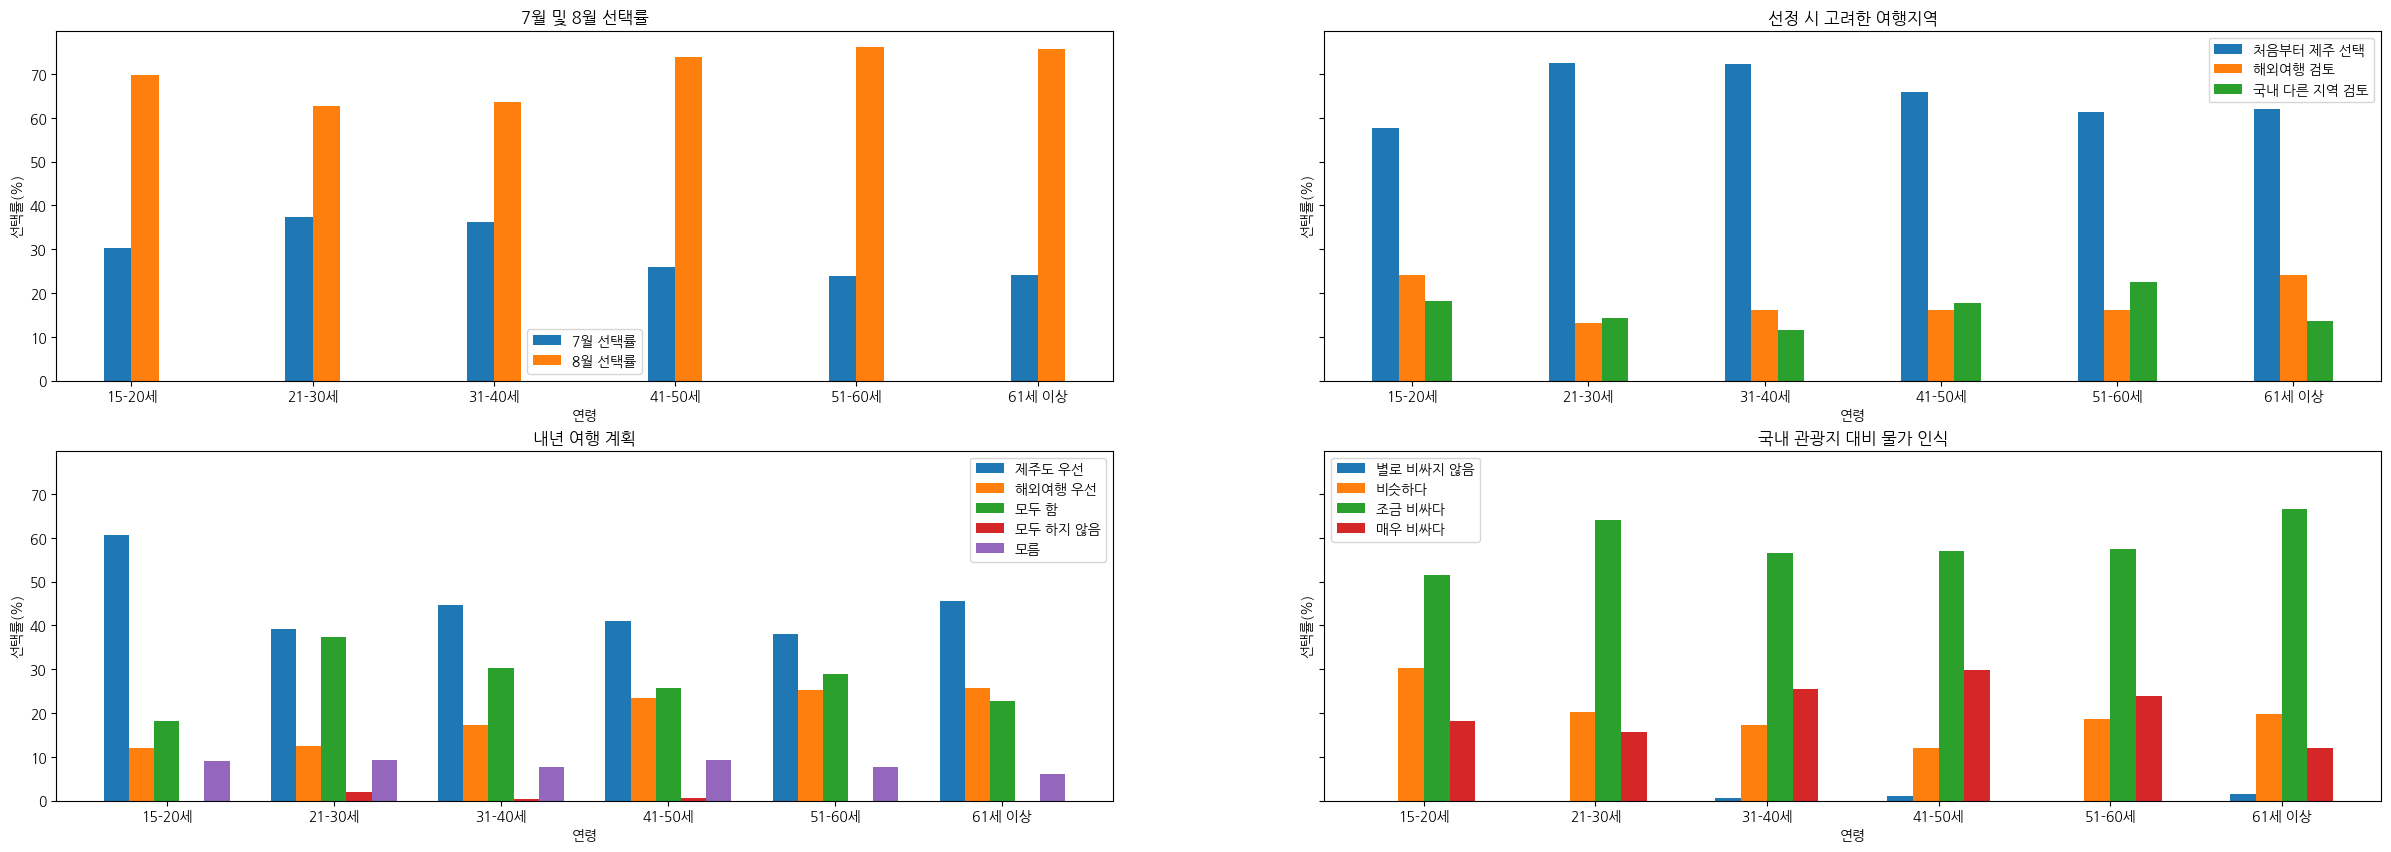

In [7]:
# 연령 시각화
age_plan = bf_result.loc[3:8, ['7월선택률(%)', '8월선택률(%)']]
age_trip = bf_result.loc[3:8, ['처음부터 제주 선택',	'해외여행 검토',	'국내 다른 지역 검토']]
age_future = bf_result.loc[3:8, ['제주도 우선',	'해외여행 우선',	'모두 함',	'모두 하지 않음',	'모름']]
age_price = bf_result.loc[3:8, ['별로 비싸지 않다',	'비슷하다',	'조금 비싸다',	'매우 비싸다']]

fig, ax = plt.subplots(2, 2, sharey=True, figsize=(30, 10))
x_labels = ['15-20세', '21-30세', '31-40세', '41-50세', '51-60세', '61세 이상']

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 서브플롯1
ax[0, 0].bar(index - bar_width/2, age_plan['7월선택률(%)'], bar_width, label='7월 선택률')
ax[0, 0].bar(index + bar_width/2, age_plan['8월선택률(%)'], bar_width, label='8월 선택률')
ax[0, 0].set_title('7월 및 8월 선택률')
ax[0, 0].set_xlabel('연령')
ax[0, 0].set_ylabel('선택률(%)')
ax[0, 0].set_xticks(index)
ax[0, 0].set_xticklabels(x_labels)
ax[0, 0].legend()

# 서브플롯2
ax[0, 1].bar(index - bar_width, age_trip['처음부터 제주 선택'], bar_width, label='처음부터 제주 선택')
ax[0, 1].bar(index, age_trip['해외여행 검토'], bar_width, label='해외여행 검토')
ax[0, 1].bar(index + bar_width, age_trip['국내 다른 지역 검토'], bar_width, label='국내 다른 지역 검토')
ax[0, 1].set_title('선정 시 고려한 여행지역')
ax[0, 1].set_xlabel('연령')
ax[0, 1].set_ylabel('선택률(%)')
ax[0, 1].set_xticks(index)
ax[0, 1].set_xticklabels(x_labels)
ax[0, 1].legend()

# 서브플롯3
ax[1, 0].bar(index - 2 * bar_width, age_future['제주도 우선'], bar_width, label='제주도 우선')
ax[1, 0].bar(index - bar_width, age_future['해외여행 우선'], bar_width, label='해외여행 우선')
ax[1, 0].bar(index, age_future['모두 함'], bar_width, label='모두 함')
ax[1, 0].bar(index + bar_width, age_future['모두 하지 않음'], bar_width, label='모두 하지 않음')
ax[1, 0].bar(index + 2 * bar_width, age_future['모름'], bar_width, label='모름')
ax[1, 0].set_title('내년 여행 계획')
ax[1, 0].set_xlabel('연령')
ax[1, 0].set_ylabel('선택률(%)')
ax[1, 0].set_xticks(index)
ax[1, 0].set_xticklabels(x_labels)
ax[1, 0].legend()

# 서브플롯4
ax[1, 1].bar(index - 1.5 * bar_width, age_price['별로 비싸지 않다'], bar_width, label='별로 비싸지 않음')
ax[1, 1].bar(index - 0.5 * bar_width, age_price['비슷하다'], bar_width, label='비슷하다')
ax[1, 1].bar(index + 0.5 * bar_width, age_price['조금 비싸다'], bar_width, label='조금 비싸다')
ax[1, 1].bar(index + 1.5 * bar_width, age_price['매우 비싸다'], bar_width, label='매우 비싸다')
ax[1, 1].set_title('국내 관광지 대비 물가 인식')
ax[1, 1].set_xlabel('연령')
ax[1, 1].set_ylabel('선택률(%)')
ax[1, 1].set_xticks(index)
ax[1, 1].set_xticklabels(x_labels)
ax[1, 1].legend()

## 가구소득 시각화
- 참고 : 2022년 4분기 기준 월평균 소득은 483만4천 원
> 출처 : https://www.sedaily.com/NewsView/29LVI9V4ER

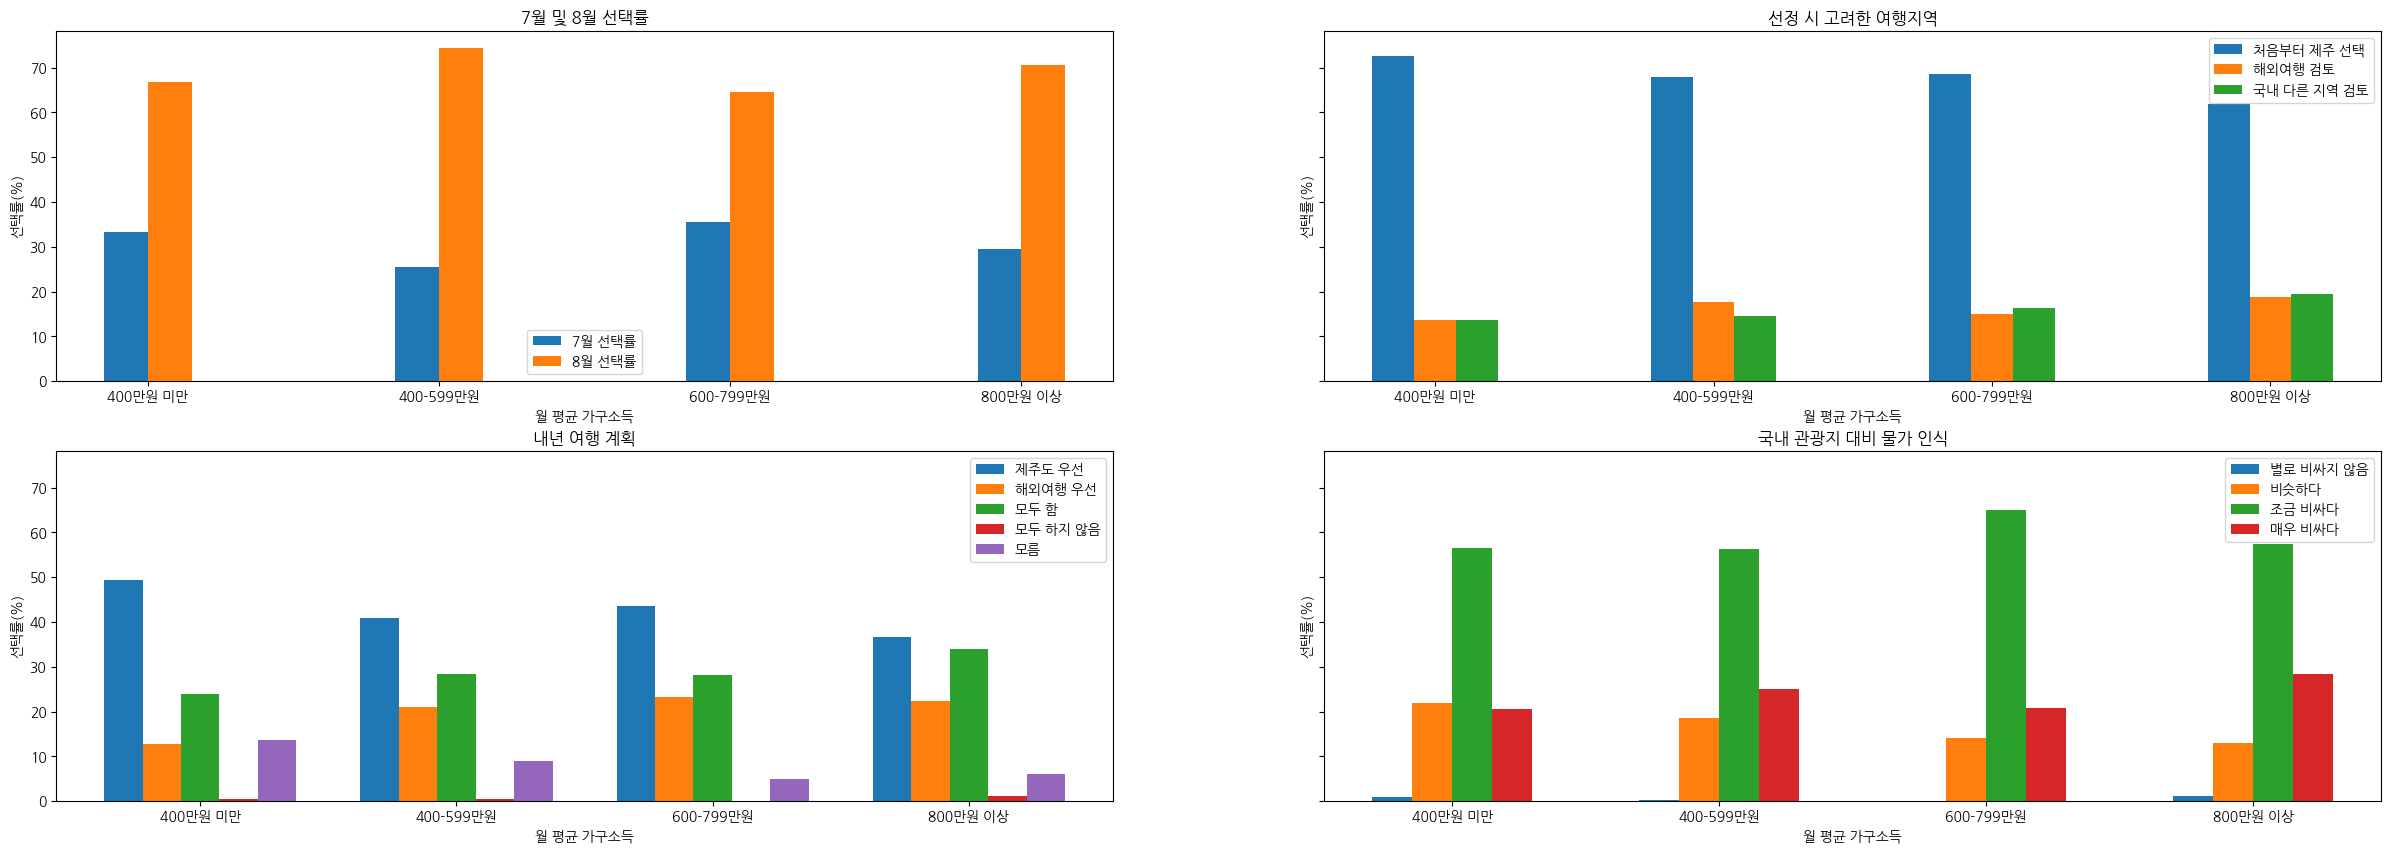

In [8]:
# 가구소득 시각화
income_plan = bf_result.loc[9:, ['7월선택률(%)', '8월선택률(%)']]
income_trip = bf_result.loc[9:, ['처음부터 제주 선택',	'해외여행 검토',	'국내 다른 지역 검토']]
income_future = bf_result.loc[9:, ['제주도 우선',	'해외여행 우선',	'모두 함',	'모두 하지 않음',	'모름']]
income_price = bf_result.loc[9:, ['별로 비싸지 않다',	'비슷하다',	'조금 비싸다',	'매우 비싸다']]

fig, ax = plt.subplots(2, 2, sharey=True, figsize=(30, 10))
x_labels = ['400만원 미만', '400-599만원', '600-799만원', '800만원 이상']

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 서브플롯1
ax[0, 0].bar(index - bar_width/2, income_plan['7월선택률(%)'], bar_width, label='7월 선택률')
ax[0, 0].bar(index + bar_width/2, income_plan['8월선택률(%)'], bar_width, label='8월 선택률')
ax[0, 0].set_title('7월 및 8월 선택률')
ax[0, 0].set_xlabel('월 평균 가구소득')
ax[0, 0].set_ylabel('선택률(%)')
ax[0, 0].set_xticks(index)
ax[0, 0].set_xticklabels(x_labels)
ax[0, 0].legend()

# 서브플롯2
ax[0, 1].bar(index - bar_width, income_trip['처음부터 제주 선택'], bar_width, label='처음부터 제주 선택')
ax[0, 1].bar(index, income_trip['해외여행 검토'], bar_width, label='해외여행 검토')
ax[0, 1].bar(index + bar_width, income_trip['국내 다른 지역 검토'], bar_width, label='국내 다른 지역 검토')
ax[0, 1].set_title('선정 시 고려한 여행지역')
ax[0, 1].set_xlabel('월 평균 가구소득')
ax[0, 1].set_ylabel('선택률(%)')
ax[0, 1].set_xticks(index)
ax[0, 1].set_xticklabels(x_labels)
ax[0, 1].legend()

# 서브플롯3
ax[1, 0].bar(index - 2 * bar_width, income_future['제주도 우선'], bar_width, label='제주도 우선')
ax[1, 0].bar(index - bar_width, income_future['해외여행 우선'], bar_width, label='해외여행 우선')
ax[1, 0].bar(index, income_future['모두 함'], bar_width, label='모두 함')
ax[1, 0].bar(index + bar_width, income_future['모두 하지 않음'], bar_width, label='모두 하지 않음')
ax[1, 0].bar(index + 2 * bar_width, income_future['모름'], bar_width, label='모름')
ax[1, 0].set_title('내년 여행 계획')
ax[1, 0].set_xlabel('월 평균 가구소득')
ax[1, 0].set_ylabel('선택률(%)')
ax[1, 0].set_xticks(index)
ax[1, 0].set_xticklabels(x_labels)
ax[1, 0].legend()

# 서브플롯4
ax[1, 1].bar(index - 1.5 * bar_width, income_price['별로 비싸지 않다'], bar_width, label='별로 비싸지 않음')
ax[1, 1].bar(index - 0.5 * bar_width, income_price['비슷하다'], bar_width, label='비슷하다')
ax[1, 1].bar(index + 0.5 * bar_width, income_price['조금 비싸다'], bar_width, label='조금 비싸다')
ax[1, 1].bar(index + 1.5 * bar_width, income_price['매우 비싸다'], bar_width, label='매우 비싸다')
ax[1, 1].set_title('국내 관광지 대비 물가 인식')
ax[1, 1].set_xlabel('월 평균 가구소득')
ax[1, 1].set_ylabel('선택률(%)')
ax[1, 1].set_xticks(index)
ax[1, 1].set_xticklabels(x_labels)
ax[1, 1].legend()